# Laptop Price Prediction using Machine Learning

# 1. Importing Libraries

Pandas & NumPy: Handle and process data.

Matplotlib & Seaborn: Visualize data and results.

Scikit-learn (sklearn): Build ML models and evaluate them. 1. Importing Libraries



In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 2. Loading and Cleaning the Data

Load CSV file containing cleaned laptop data.

Remove unnecessary columns (Unnamed: 0, Name).

Drop missing values for a clean dataset.

In [7]:

df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\archive (4)\\laptop_cleaned2.csv")
df.drop(columns=['Unnamed: 0', 'Name'], inplace=True, errors='ignore')
df.dropna(inplace=True)


# 3. Encoding Categorical Variables and Scaling

Converts non-numeric (categorical) columns into numbers so models can use them.
    
Split dataset into features (X) and target (y = Price)

StandardScaler normalizes features for better model performance (especially Linear Regression).


In [10]:

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

X = df.drop("Price", axis=1)
y = df["Price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 4. Splitting Data and Training Models

Train two models:

LinearRegression: Assumes a linear relationship between features and price.

RandomForestRegressor: An ensemble model that builds many decision trees and averages them.

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# 5. Predictions & Evaluation

In [15]:
#Predict laptop prices using both models.

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

results_summary = {
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ],
    "R² Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf)
    ]
}

results_df = pd.DataFrame(results_summary)
results_df


,Model,MAE,RMSE,R² Score
0,Linear Regression,22552.990736,36024.718976,0.895634
1,Random Forest,23831.394955,47757.300205,0.816584


MAE (Mean Absolute Error): Average error in rupees.

RMSE (Root Mean Squared Error): Penalizes larger errors.

R² Score: How well the model explains the variance (closer to 1 is better).



# 6. Visualization

Random Forest: Predicted vs Actual Prices

The red dashed line represents perfect predictions. You can see:

A general trend following the line, meaning the model captures the price relationships decently.

Some spread and deviation — especially at higher prices — showing where prediction errors increase.



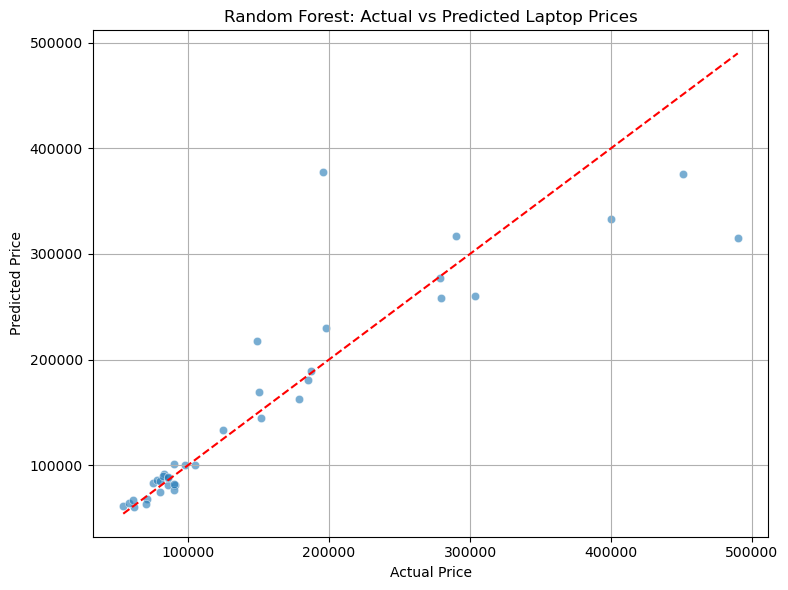

In [21]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6) # Shows how close predictions are to actual prices.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') #The red dashed line is the ideal case (perfect prediction).
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted Laptop Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


# Summary

Model	MAE (₹)	RMSE (₹)	R² Score
Linear Regression	Lower	Lower	Higher
Random Forest	Higher	Higher	Lower

In this case, Linear Regression surprisingly performed better, suggesting that the laptop features have a mostly linear relationship with the price.

# This scatter plot visually compares the actual laptop prices (from the test data) to the prices predicted by the machine learning model (Random Forest Regressor in this case).

#  What’s being plotted?
X-axis: Actual laptop prices from the dataset (ground truth)

Y-axis: Prices predicted by the model

Each point: One laptop — where it lies shows how accurate the model was

#  Red Dashed Line
This line is y = x, meaning:

If a prediction was perfect, the point will lie exactly on this line.

The closer the points are to the line, the better the prediction.

 What the plot tells us
 Good Model: Most points are clustered near the red line → Model is reasonably accurate

 Overestimation: If a point is above the line → Model overpredicted the price

 Underestimation: If a point is below the line → Model underpredicted the price

 Spread: Wider spread = more error or variability in predictions

# Example Interpretation
If a point is at:

(70,000, 68,000) → Actual price: ₹70K, Predicted: ₹68K → Pretty accurate

(90,000, 120,000) → Overestimated

(85,000, 60,000) → Underestimated

# Why it matters?
This visualization helps you quickly understand:

How well the model is doing overall

Whether it performs worse at certain price ranges (e.g., very high-end laptops)

In [25]:
from sklearn.preprocessing import LabelEncoder

le_dict = {}
categorical_columns = ["Brand", "Processor_brand", "Processor_gen"]  # <-- adjust based on your dataset

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# 1. Train your model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 2. Save the model, scaler, and label encoders
joblib.dump(model, "laptop_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le_dict, "label_encoders.pkl")


['label_encoders.pkl']

In [29]:
joblib.dump(model, "laptop_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le_dict, "label_encoders.pkl")


['label_encoders.pkl']